In [16]:
import numpy as np
import pandas as pd
import itertools
import copy
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [17]:
iris = pd.read_csv('data/iris.csv').iloc[:, 1:]

In [18]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
iris.Species = le.fit_transform(iris.Species)

In [20]:
class Aglomerative:
    # A, B = satu cluster
    def single(self, A, B):
        i = 0
        for a, b in itertools.product(A, B):
            if (i == 0):
                temp = self.dist(a, b)
            else:
                temp = min(self.dist(a, b), temp)
            i += 1

        return temp

    def complete(self, A, B):
        i = 0
        for a, b in itertools.product(A, B):
            if (i == 0):
                temp = self.dist(a, b)
            else:
                temp = max(self.dist(a, b), temp)
            i += 1

        return temp

    def average(self, A, B):
        i = 0
        temp_sum = 0
        for a, b in itertools.product(A, B):
            temp_sum += self.dist(a, b)
            i += 1

        return temp_sum/i

    def average_group(self, A, B):
        i = 0
        for index in A:
            if i == 0:
                cluster_A = [Model.data[index]]
            else:
                cluster_A.append(Model.data[index])
            i += 1
        cluster_A = np.array(cluster_A)
        mean_A = np.mean(cluster_A, axis=0)

        i = 0
        for index in B:
            if i == 0:
                cluster_B = [Model.data[index]]
            else:
                cluster_B.append(Model.data[index])
            i += 1
        cluster_B = np.array(cluster_B)
        mean_B = np.mean(cluster_B, axis=0)

        temp = 0
        for x, y in zip(mean_A, mean_B):
            temp += abs(x - y)

        return temp

    # a, b = satu data dalam sebuah cluster
    def dist(self, a, b):
        temp = 0
        for x, y in zip(self.data[a], self.data[b]):
            temp += abs(x - y)

        return temp

    # distance_function = [single, complete, average, average_group]
    def __init__(self, data, distance_function_name):
        self.data = data.to_numpy()
        self.cluster = []
        self.cluster_history = []
        
        for i in range(len(self.data)):
            self.cluster.append([i])

        self.distance = self.__getattribute__(distance_function_name)
        self.train()

    def train(self):
        while (len(self.cluster) != 1):            
            sum_of_distance = 0
            for i in range(len(self.cluster)):
                for j in range(i + 1, len(self.cluster)):                        
                    temp = self.distance(self.cluster[i], self.cluster[j])
                    if (i == 0 and j == 1):
                        min_distance = temp
                        min_index = [i, j]
                    else:
                        if (temp < min_distance):
                            min_distance = temp
                            min_index = [i, j]
                        
                    sum_of_distance += temp

            self.cluster_history.append((sum_of_distance, copy.deepcopy(self.cluster)))

            # Gabungin 2 cluster dengan jarak minimum
            a = self.cluster[min_index[0]]
            b = self.cluster[min_index[1]]
            self.cluster.append(a + b)
            self.cluster.remove(a)
            self.cluster.remove(b)
        self.cluster_history.append((0, copy.deepcopy(self.cluster)))

    def get_result_by_treshold(self, treshold):
        for distance_sum, cluster in self.cluster_history:
            if (distance_sum < treshold):
                return cluster

    def get_result_by_number_of_cluster(self, number_of_cluster):
        for distance_sum, cluster in self.cluster_history:
            if (len(cluster) <= number_of_cluster):
                return cluster

    def get_group_by_number_cluster(self, number_of_cluster):
        result = self.get_result_by_number_of_cluster(number_of_cluster)
        cluster_of = []
        for i in range(len(self.data)):
            found = False
            for index, cluster in enumerate(result, start=0):
                if (i in cluster) and (not found):
                    cluster_of.append(index)
                    found = True
            if found:
                found = False
            else:
                cluster_of.append(None)
        
        return cluster_of
        

        

In [21]:
Model = Aglomerative(iris.iloc[:, :4], "average")

In [22]:
Model.get_group_by_number_cluster(3)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2]

In [23]:
Model.get_result_by_number_of_cluster(3)

[[41,
  15,
  14,
  32,
  33,
  23,
  26,
  43,
  36,
  20,
  31,
  10,
  48,
  46,
  19,
  21,
  35,
  4,
  40,
  0,
  17,
  27,
  28,
  49,
  7,
  39,
  44,
  18,
  5,
  16,
  22,
  25,
  37,
  9,
  34,
  1,
  12,
  45,
  24,
  11,
  29,
  30,
  6,
  3,
  47,
  2,
  42,
  13,
  8,
  38],
 [77,
  110,
  147,
  104,
  128,
  132,
  111,
  103,
  116,
  137,
  120,
  143,
  140,
  124,
  144,
  112,
  139,
  141,
  145,
  100,
  115,
  136,
  148,
  108,
  134,
  117,
  131,
  135,
  118,
  105,
  122,
  109,
  107,
  130,
  102,
  125,
  129],
 [98,
  60,
  57,
  93,
  114,
  121,
  113,
  101,
  142,
  70,
  149,
  127,
  138,
  146,
  123,
  126,
  83,
  72,
  133,
  65,
  75,
  54,
  58,
  76,
  50,
  52,
  86,
  85,
  51,
  56,
  73,
  78,
  63,
  91,
  71,
  74,
  97,
  106,
  64,
  79,
  59,
  53,
  89,
  69,
  80,
  81,
  66,
  84,
  90,
  67,
  82,
  92,
  61,
  55,
  94,
  95,
  96,
  88,
  99,
  62,
  119,
  68,
  87]]

In [24]:
Model.get_result_by_treshold(20)

[[41,
  15,
  14,
  32,
  33,
  23,
  26,
  43,
  36,
  20,
  31,
  10,
  48,
  46,
  19,
  21,
  35,
  4,
  40,
  0,
  17,
  27,
  28,
  49,
  7,
  39,
  44,
  18,
  5,
  16,
  22,
  25,
  37,
  9,
  34,
  1,
  12,
  45,
  24,
  11,
  29,
  30,
  6,
  3,
  47,
  2,
  42,
  13,
  8,
  38],
 [77,
  110,
  147,
  104,
  128,
  132,
  111,
  103,
  116,
  137,
  120,
  143,
  140,
  124,
  144,
  112,
  139,
  141,
  145,
  100,
  115,
  136,
  148,
  108,
  134,
  117,
  131,
  135,
  118,
  105,
  122,
  109,
  107,
  130,
  102,
  125,
  129],
 [98,
  60,
  57,
  93,
  114,
  121,
  113,
  101,
  142,
  70,
  149,
  127,
  138,
  146,
  123,
  126,
  83,
  72,
  133,
  65,
  75,
  54,
  58,
  76,
  50,
  52,
  86,
  85,
  51,
  56,
  73,
  78,
  63,
  91,
  71,
  74,
  97,
  106,
  64,
  79,
  59,
  53,
  89,
  69,
  80,
  81,
  66,
  84,
  90,
  67,
  82,
  92,
  61,
  55,
  94,
  95,
  96,
  88,
  99,
  62,
  119,
  68,
  87]]

In [25]:
Arr = [2, 44, 12, 12, 85, 23]

# Visualisasi

## Awal

Text(0, 0.5, 'Sepal Width')

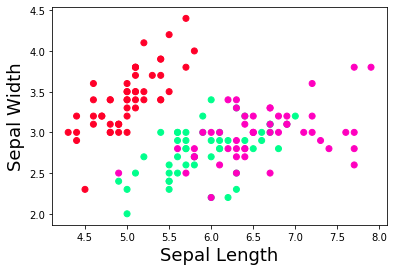

In [28]:
plt.scatter(iris.iloc[:,0], iris.iloc[:,1], c=iris.iloc[:,4], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

Text(0, 0.5, 'Petal Length')

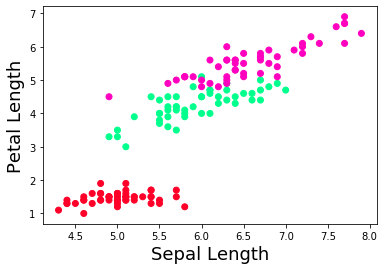

In [29]:
plt.scatter(iris.iloc[:,0], iris.iloc[:,2], c=iris.iloc[:,4], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Petal Length', fontsize=18)

Text(0, 0.5, 'Petal Width')

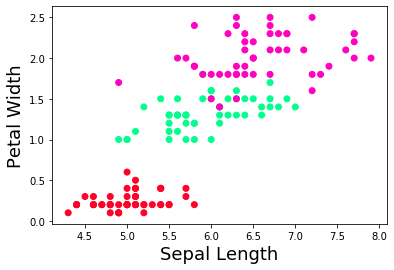

In [30]:
plt.scatter(iris.iloc[:,0], iris.iloc[:,3], c=iris.iloc[:,4], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)

Text(0, 0.5, 'Petal Length')

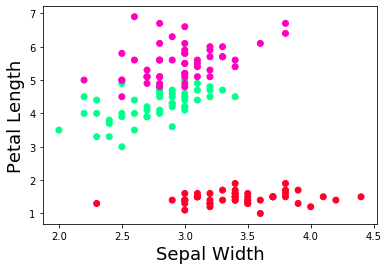

In [31]:
plt.scatter(iris.iloc[:,1], iris.iloc[:,2], c=iris.iloc[:,4], cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Petal Length', fontsize=18)

Text(0, 0.5, 'Petal Width')

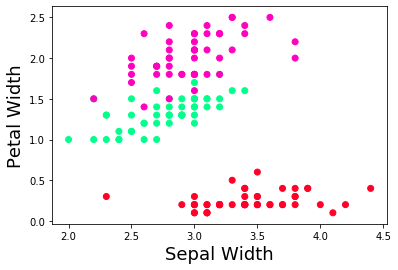

In [32]:
plt.scatter(iris.iloc[:,1], iris.iloc[:,3], c=iris.iloc[:,4], cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)

Text(0, 0.5, 'Petal Width')

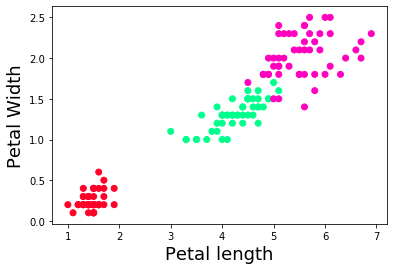

In [33]:
plt.scatter(iris.iloc[:,2], iris.iloc[:,3], c=iris.iloc[:,4], cmap='gist_rainbow')
plt.xlabel('Petal length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)

## Output Alomerative

Text(0, 0.5, 'Sepal Width')

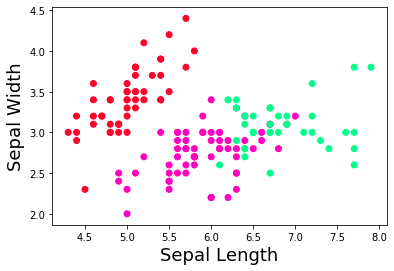

In [34]:
plt.scatter(iris.iloc[:,0], iris.iloc[:,1], c=Model.get_group_by_number_cluster(3), cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

Text(0, 0.5, 'Petal Length')

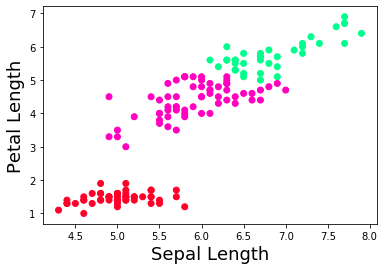

In [35]:
plt.scatter(iris.iloc[:,0], iris.iloc[:,2], c=Model.get_group_by_number_cluster(3), cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Petal Length', fontsize=18)

Text(0, 0.5, 'Petal Width')

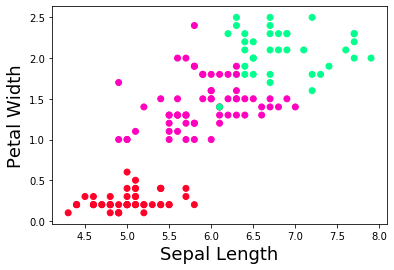

In [36]:
plt.scatter(iris.iloc[:,0], iris.iloc[:,3], c=Model.get_group_by_number_cluster(3), cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)

Text(0, 0.5, 'Petal Length')

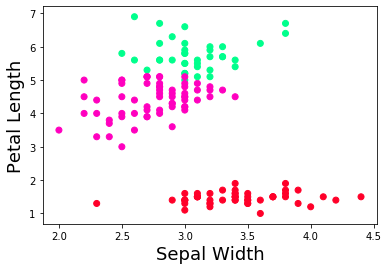

In [37]:
plt.scatter(iris.iloc[:,1], iris.iloc[:,2], c=Model.get_group_by_number_cluster(3), cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Petal Length', fontsize=18)

Text(0, 0.5, 'Petal Width')

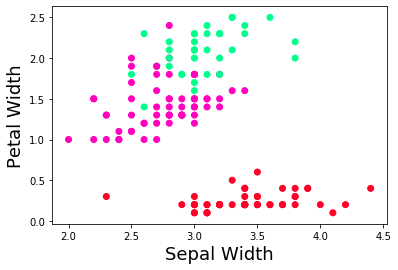

In [38]:
plt.scatter(iris.iloc[:,1], iris.iloc[:,3], c=Model.get_group_by_number_cluster(3), cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)

Text(0, 0.5, 'Petal Width')

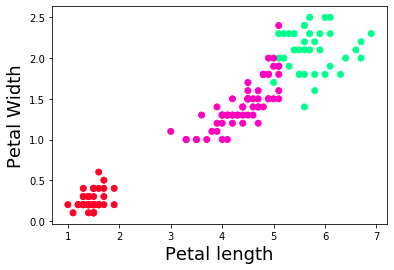

In [39]:
plt.scatter(iris.iloc[:,2], iris.iloc[:,3], c=Model.get_group_by_number_cluster(3), cmap='gist_rainbow')
plt.xlabel('Petal length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)